<center><b>EE 538 Autumn 2020<br>
Analog Circuits for Sensor Systems<br>
University of Washington Electrical & Computer Engineering</b></center>


<b>Instructor: Jason Silver<br>
Assignment #2 (10 points)<br>
Due Sunday, October 18 (Submit on Canvas as a Jupyter Notebook)</b> 

*Please show your work*

<b>Problem 1: Common-emitter amplifier, small-signal analysis

<center><img src="img/HW2_common_emitter.png" width=400></center>

The common-emitter amplifier can be used to achieve high levels of voltage gain in analog circuits. However, gain can be affected by loading at both at the input and output of the amplifier, so we need to ensure that minimal loading occurs when the amplifier is connected to a sensor or other circuit blocks. In addition, the bandwidth over which the maximum gain can be achieved is limitied by the presence of capacitance, which results in loading at higher frequencies (away from DC).

For the following, $T = 27C$, $R_C = 1k\Omega$, $V_S (DC) = 0.69V$, $V_{CC} = 5V$, and $C_L = 100nF$

Use the NXP 2N3904 $npn$ transistor ($V_A = 100V$, $\beta = 300$, $I_S = 10^{-14}$) for your analysis and simulations.

<u>*Analysis*</u>

__a)__ Sketch the small-signal model and determine an expression for the the transfer function $\dfrac{V_{out}}{V_s}(s)$ in terms of $g_m$, $\beta$, $R_C$, $r_o$, and $C_{L}$. Assume no DC loading (i.e. $R_S \rightarrow 0$ and $R_L \rightarrow \infty$).

*Solution:*

The small signal model of common-emitter amplifier:

<center><img src="img/HW2_a.png" width=600></center>

The output voltage can be written as (assuming $R_S \rightarrow 0$ and $R_L \rightarrow \infty$ ): 
$$ V_{out}(s) = -g_m\left(R_C||\dfrac{1}{sC_L}||r_o\right) \cdot V_{s}(s) $$

The transfer function is thus

$$ \dfrac{V_{out}}{V_s}(s) =-g_m \left(R_C||\dfrac{1}{sC_L}||r_o\right) = -\dfrac{g_{m}R_{eq}}{sC_{L}R_{eq}+1} $$

where

$$ R_eq = \dfrac{R_Cr_{o}}{R_C+r_{o}} $$


__b)__ Calculate the DC gain, input resistance, output resistance, and 3dB bandwidth of the amplifier (again, assuming no loading) using the component and parameter values provided. Plot the frequency response (magnitude and phase) of $\dfrac{V_{out}}{V_s}(s)$.

*Solution:*

Calculate the DC gain:

$$A_{DC}(s=0)= \dfrac{V_{out}}{V_s}(s=0)=-g_m \cdot R_{eq}=gm \cdot \dfrac{R_Cr_{o}}{R_C+r_o}$$

Input resistance and output resistance can be calculated from small signal model:

$$R_{in}=\dfrac{\beta}{g_m}$$

$$R_{out}=R_{eq}=\dfrac{R_Cr_o}{R_C+r_o}$$

3dB BW of the amplifier:

$$f_{-3dB}=\dfrac{1}{2\pi R_{eq}C_{L}}$$

Calculate the number by using the parameter value provided:

In [9]:
#%matplotlib notebook
#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

#Parameter value provided:
R_C = 1e3
T=27+273
C_L = 100e-9
V_S=0.69
V_A=100
beta=300
I_S=1e-14
k=1.38e-23
q=1.6e-19
VT=k*T/q;

#calculate IC, gm, etc
I_C=I_S*(np.exp(V_S/VT)-1)
gm=I_C/VT
ro=V_A/I_C
Req=R_C*ro/(R_C+ro)

#Calculate gain, rin, rout, and BW.
Adc=gm*Req
rin=beta/gm
rout=Req
f_3db=1/2/np.pi/Req/C_L

In [10]:
print('The DC voltage gain is', f'{Adc:0.5}','V/V','which is',f'{20*np.log10(Adc):0.4}', 'dB')
print('The input resistance is', f'{rin:0.3}', 'Ohms')
print('The output resistance is', f'{rout:0.4}', 'Ohms')
print('The 3dB bandwidth of amplifier is', f'{f_3db:0.3}', 'Hz')

The DC voltage gain is 141.92 V/V which is 43.04 dB
The input resistance is 2.04e+03 Ohms
The output resistance is 963.3 Ohms
The 3dB bandwidth of amplifier is 1.65e+03 Hz


Text(0.5, 0, 'Frequency [Hz]')

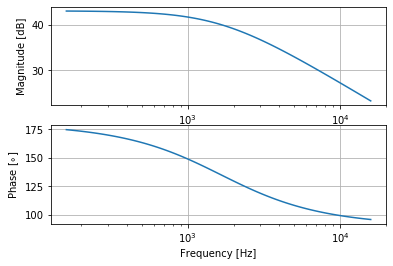

In [19]:
tf = signal.TransferFunction([-Adc],[C_L*Req, 1])
w, mag, phase = tf.bode() 
f = w/np.pi/2

fig, ax = plt.subplots(2)
ax[0].semilogx(f, mag)
ax[0].grid()
ax[0].set_ylabel('Magnitude [dB]')

ax[1].semilogx(f, phase)
ax[1].grid()
ax[1].set_ylabel('Phase [$\circ$]')
ax[1].set_xlabel('Frequency [Hz]')


<u>*Simulation/Design*</u>

__c)__ Simulate the DC operating point (.op analysis) of the circuit in SPICE (still no loading, $R_S \rightarrow 0$ and $R_L \rightarrow \infty$). Provide a screen capture of your circuit with all DC operating points labeled (right-click on the net and select *Place .op Data Label*).

Perform an AC simulation of the circuit and plot the frequency reponse. Indicate both the gain at $f = 10Hz$ and the 3dB bandwidth on the magnitude plot. 

Perform a transient analysis of the circuit to verify the gain. Use a sinusoidal voltage as an input signal with an amplitude of $500 \mu V$, frequency of $10 Hz$, and DC offset of $0.69V$. Show that the peak-to-peak amplitude of the output agrees with your calculation from Part b and your AC analysis result.

*Solution:*

Screen capture of DC operating point and simulation set-up:

<center><img src="img/HW2_c1.png" width=800></center>

Perform an AC simulation and frequency response is shown as below:

<center><img src="img/HW2_c3.png" width=1500></center>

AC simulation shows: gain at $f=10Hz$ is $42.6dB$, and 3dB bandwidth is $1.64 kHz$.

Perform transient simulation to calculate the gain:

<center><img src="img/HW2_c4.png" width=1500></center>

The peak to peak amplitude of output is $135mV$. 

Calculate gain from transient simulation: $A_{dc}=20log\frac{135e-3}{1e-3}=42.6dB$, which matches well with the AC simulation result. 

Gain simulated in LTSPice has slight difference with analytical model (0.5dB) which is tolerable.

__d)__ Calculate the values of $R_S$ and $R_L$ that each result in 1% attenuation from input to output ($V_s$ to $V_{out}$). Calculate each value separately (such that the combined attenuation would be around 2%). Verify your calculations by including the calculated values of $R_S$ and $R_L$ in your SPICE simulation. 

*Solution:*

1% attenuation at input:

$$\frac{R_s}{R_{s}+R_{in}}<1\%$$

1% attenuation at output:

$$\frac{R_{out}}{R_{out}+R_{L}}<1\%$$


In [13]:
Rs=rin/99
RL=rout*99

In [14]:
print('The source resistance is about', f'{Rs:0.3}', 'Ohms')
print('The load resistance is about', f'{RL:0.4}', 'Ohms')

The source resistance is about 20.6 Ohms
The load resistance is about 9.536e+04 Ohms


In [ ]:
Verify in LTSpice simulation:

<center><img src="img/HW2_d.png" width=1500></center>

DC gain is $42.4dB$ which is attenuated by $0.2dB$ (Around $ 2.4\%$ attenuation). We can further decrease $R_s$ or increase $R_L$ to reduce the attenuation. 